## Try to replicate SMT

In [1]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from tools import *


# Check that MPS is available
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("MPS is enabled!")
elif torch.cuda.is_available():
    device = torch.device("cuda")


MPS is enabled!


### 1. Generate data from Archimedean spiral

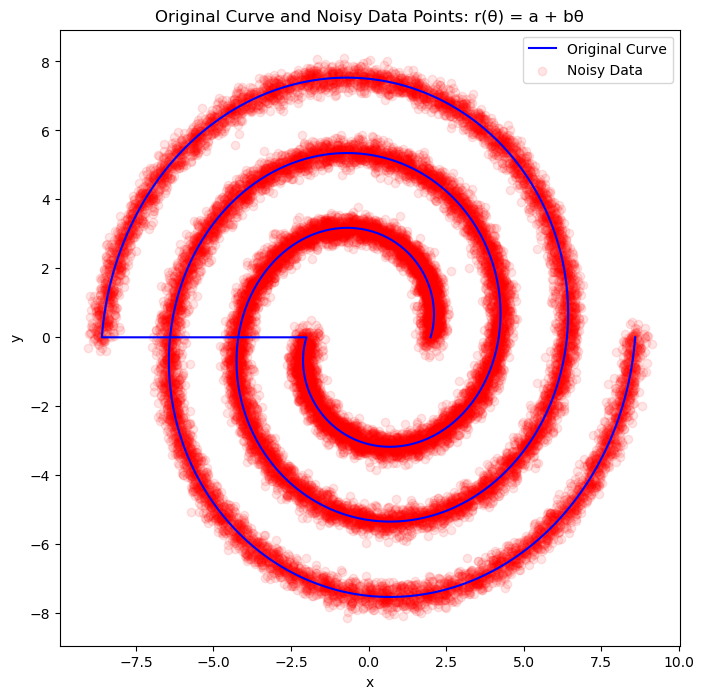

In [2]:
data = GenerateDataset()

## Sparse coding

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

class SparseCoding():
    def __init__(self, data_size, activ_dim, basisfunc_num, sparsity_level):
        super(SparseCoding, self).__init__()
        self.Basis = torch.randn(basisfunc_num, activ_dim, requires_grad=True)
        self.Activ = torch.randn(data_size, basisfunc_num, requires_grad=True)
        self.sparsity_level = sparsity_level

    def loss(self,data):
        reconstruction = self.Activ @ self.Basis

        # Compute the squared differences
        squared_error= (reconstruction - data) ** 2

        # Compute the sum of squared differences
        sum_squared_error = torch.sum(squared_error)

        # Compute the number of samples
        num_samples = data.shape[0]

        return sum_squared_error/num_samples
    
    def activ_panalty(self):
        return self.sparsity_level * torch.norm(self.Activ, p=1)

    def plot_basis(self):
        # Plotting in polar coordinates
        plt.figure(figsize=[6, 6])

        # Detach the tensor before converting to numpy
        basis_np = self.Basis.detach().numpy()

        # plot dictionary elements
        ax = plt.subplot(111)
        ax.scatter(basis_np[:, 0], basis_np[:, 1], label='landmarks', color='blue')

        # Setting the title and labels
        ax.set_title("Landmarks learnt by Sparse coding")
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.legend()

        # Show the plot
        plt.show()


data_tensor = torch.tensor(data, dtype=torch.float)
# Create an instance of SparseCoding model
model = SparseCoding(data_size=data_tensor.shape[0], activ_dim=data_tensor.shape[1], basisfunc_num=100, sparsity_level=0)



In [4]:
# Define optimizer
optimizer = optim.Adam([model.Activ, model.Basis], lr=0.01)

# Number of optimization steps
num_epochs = 100

# Training loop
for epoch in range(num_epochs):

    # Total loss = Reconstruction loss + Sparsity penalty
    cost = model.loss(data_tensor) + model.activ_panalty()
    
    # Zero gradients, perform a backward pass, and update the weights
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    with torch.no_grad():
        model.Activ /= torch.norm(model.Activ, dim=1, p=1, keepdim=True)

    # Print progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Cost = {cost}')

# After training, you can use the learned dictionary to encode new data
encoded_data = model.Activ @ model.Basis
print("Encoded data shape:", encoded_data.shape)


print(model.Basis.shape)





Epoch [10/100], Cost = 23.581605911254883
Epoch [20/100], Cost = 23.494155883789062
Epoch [30/100], Cost = 23.496057510375977
Epoch [40/100], Cost = 23.43328094482422
Epoch [50/100], Cost = 23.319753646850586
Epoch [60/100], Cost = 23.162525177001953
Epoch [70/100], Cost = 22.967363357543945
Epoch [80/100], Cost = 22.73872184753418
Epoch [90/100], Cost = 22.480613708496094
Epoch [100/100], Cost = 22.196521759033203
Encoded data shape: torch.Size([21600, 2])
torch.Size([100, 2])


tensor(22.1668, grad_fn=<DivBackward0>)


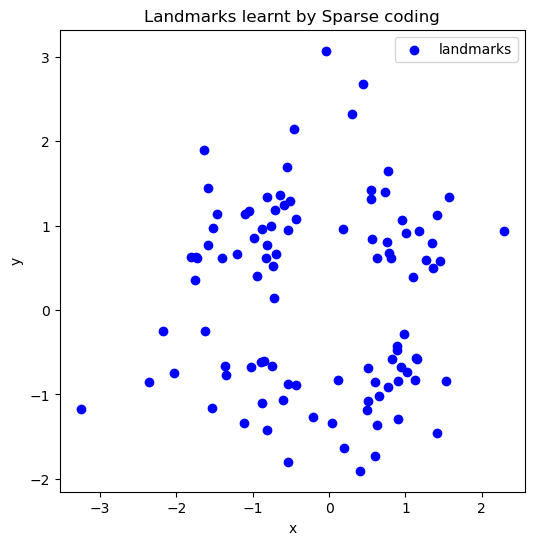

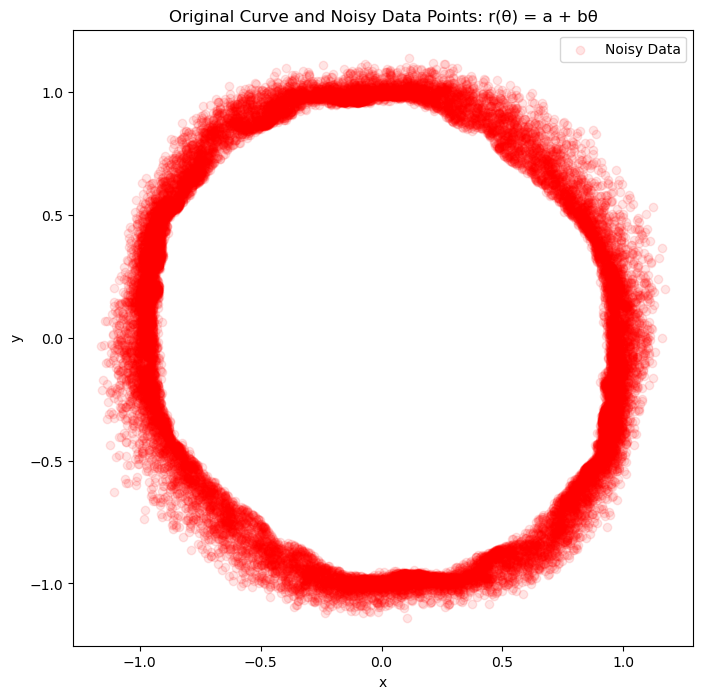

0.102417156


In [5]:
print(model.loss(data_tensor))


# # Compute the squared differences
# squared_error= (reconstruction - data) ** 2

# # Compute the sum of squared differences
# sum_squared_error = torch.sum(squared_error)

# # Compute the number of samples
# num_samples = data.shape[0]

# return sum_squared_error/num_samples
Bas = model.Basis.detach()
Act = model.Activ.detach()

recon = Act @ Bas
# Plotting in polar coordinates

# Original curve label='Original Curve', color='blue')
model.plot_basis()

plt.figure(figsize=[8, 8])

# Noisy data points
ax = plt.subplot(111)
ax.scatter(recon[:, 0], recon[:, 1], label='Noisy Data', color='red', alpha=0.1)

# Setting the title and labels
ax.set_title("Original Curve and Noisy Data Points: r(θ) = a + bθ")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
plt.show()

# Show the plot

print(np.linalg.norm(Act[0,:]))


tensor([-0.0110,  0.0092,  0.0092, -0.0087, -0.0088,  0.0086, -0.0088,  0.0119,
        -0.0021, -0.0088,  0.0114, -0.0126,  0.0118,  0.0096, -0.0098, -0.0091,
         0.0091,  0.0094,  0.0079, -0.0118,  0.0094, -0.0109,  0.0097, -0.0092,
        -0.0092, -0.0099, -0.0090, -0.0112, -0.0103, -0.0149, -0.0102,  0.0111,
         0.0141,  0.0101,  0.0090,  0.0092,  0.0122,  0.0018,  0.0013, -0.0138,
        -0.0090,  0.0037,  0.0094, -0.0071,  0.0092, -0.0090,  0.0145,  0.0106,
         0.0088, -0.0097,  0.0096, -0.0166, -0.0101, -0.0072,  0.0097,  0.0152,
        -0.0145,  0.0087, -0.0099,  0.0110,  0.0089, -0.0150,  0.0116, -0.0146,
        -0.0105,  0.0042, -0.0089, -0.0087,  0.0092, -0.0095,  0.0116,  0.0080,
        -0.0095, -0.0116, -0.0149,  0.0145,  0.0138,  0.0093,  0.0100,  0.0106,
         0.0088,  0.0090,  0.0101, -0.0105, -0.0095,  0.0102, -0.0101,  0.0087,
         0.0092,  0.0142,  0.0093, -0.0091, -0.0112,  0.0096, -0.0109, -0.0107,
         0.0093,  0.0089, -0.0066,  0.00

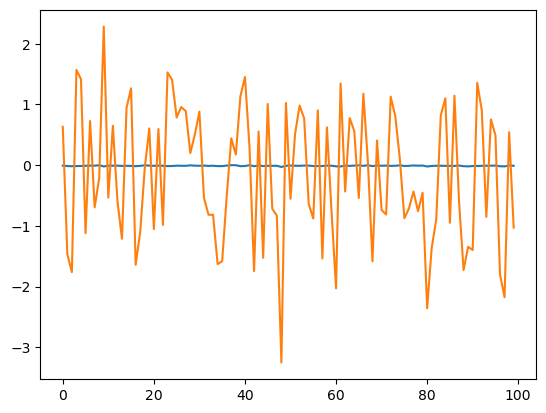

In [6]:
idx = 2034
print(Act[idx])
print(Act[idx] @ Bas)

vec = Act[idx] * Bas[:,0]
print(Act[idx].shape)
print(torch.norm(Act[idx],p=1))
plt.plot(vec)
plt.plot(Bas[:,0])